In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# data description
data_info = pd.read_csv('lending_club_info.csv',index_col='LoanStatNew')

def feat_info(col_name):
    print(data_info.loc[col_name]['Description'])
    
feat_info('mort_acc')

Number of mortgage accounts.


In [4]:
# load the data
df = pd.read_csv('lending_club_loan.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
loan_amnt               396030 non-null float64
term                    396030 non-null object
int_rate                396030 non-null float64
installment             396030 non-null float64
grade                   396030 non-null object
sub_grade               396030 non-null object
emp_title               373103 non-null object
emp_length              377729 non-null object
home_ownership          396030 non-null object
annual_inc              396030 non-null float64
verification_status     396030 non-null object
issue_d                 396030 non-null object
loan_status             396030 non-null object
purpose                 396030 non-null object
title                   394275 non-null object
dti                     396030 non-null float64
earliest_cr_line        396030 non-null object
open_acc                396030 non-null float64
pub_rec                 396030 non-nu

<AxesSubplot:xlabel='loan_status', ylabel='count'>

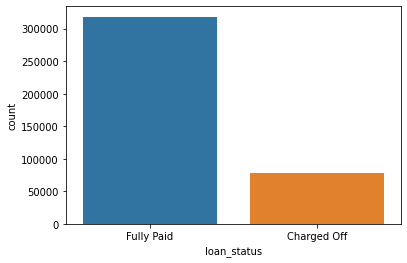

In [5]:
# create a countplot
sns.countplot(data=df, x='loan_status')

(0.0, 45000.0)

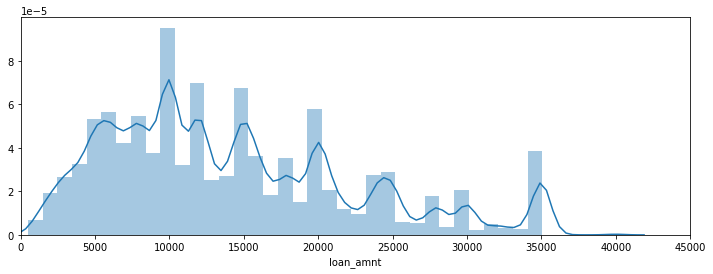

In [6]:
# create a histgram of the laon_amount
plt.figure(figsize=(12,4))
sns.distplot(df['loan_amnt'],kde=True,bins=40)
plt.xlim(0,45000)

In [7]:
# explore the correlation bwteen all continous variables
df.corr()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
loan_amnt,1.000000,0.168921,0.953929,0.336887,0.016636,0.198556,-0.077779,0.328320,0.099911,0.223886,0.222315,-0.106539
int_rate,0.168921,1.000000,0.162758,-0.056771,0.079038,0.011649,0.060986,-0.011280,0.293659,-0.036404,-0.082583,0.057450
installment,0.953929,0.162758,1.000000,0.330381,0.015786,0.188973,-0.067892,0.316455,0.123915,0.202430,0.193694,-0.098628
annual_inc,0.336887,-0.056771,0.330381,1.000000,-0.081685,0.136150,-0.013720,0.299773,0.027871,0.193023,0.236320,-0.050162
dti,0.016636,0.079038,0.015786,-0.081685,1.000000,0.136181,-0.017639,0.063571,0.088375,0.102128,-0.025439,-0.014558
open_acc,0.198556,0.011649,0.188973,0.136150,0.136181,1.000000,-0.018392,0.221192,-0.131420,0.680728,0.109205,-0.027732
pub_rec,-0.077779,0.060986,-0.067892,-0.013720,-0.017639,-0.018392,1.000000,-0.101664,-0.075910,0.019723,0.011552,0.699408
revol_bal,0.328320,-0.011280,0.316455,0.299773,0.063571,0.221192,-0.101664,1.000000,0.226346,0.191616,0.194925,-0.124532
revol_util,0.099911,0.293659,0.123915,0.027871,0.088375,-0.131420,-0.075910,0.226346,1.000000,-0.104273,0.007514,-0.086751
total_acc,0.223886,-0.036404,0.202430,0.193023,0.102128,0.680728,0.019723,0.191616,-0.104273,1.000000,0.381072,0.042035


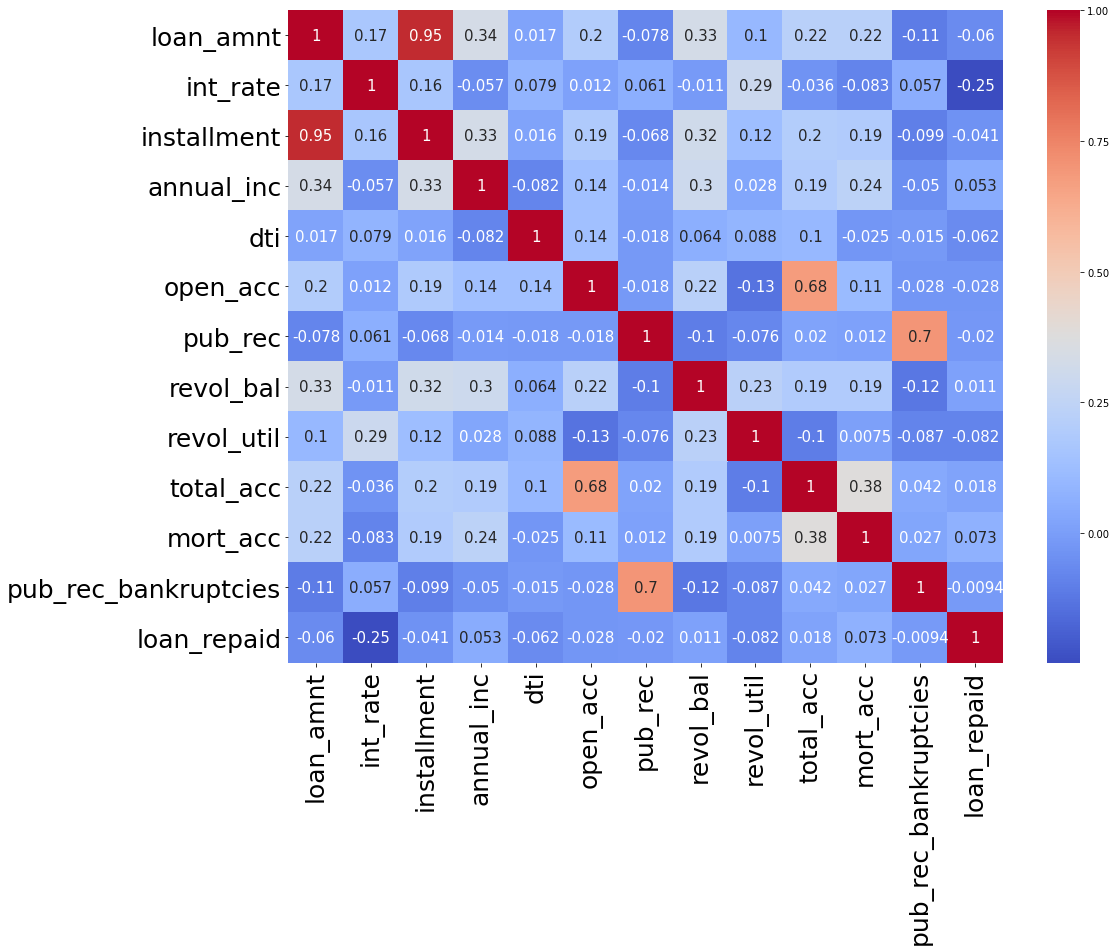

In [72]:
# visualize the correlation
plt.figure(figsize=(16,12))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', annot_kws={"fontsize":15})
plt.tick_params(axis='both', labelsize=25)

In [9]:
# Notice there is a particularly high correlation between installment andf loan_amnt
# check the information on those two variables
feat_info('installment')
feat_info('loan_amnt')

The monthly payment owed by the borrower if the loan originates.
The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.


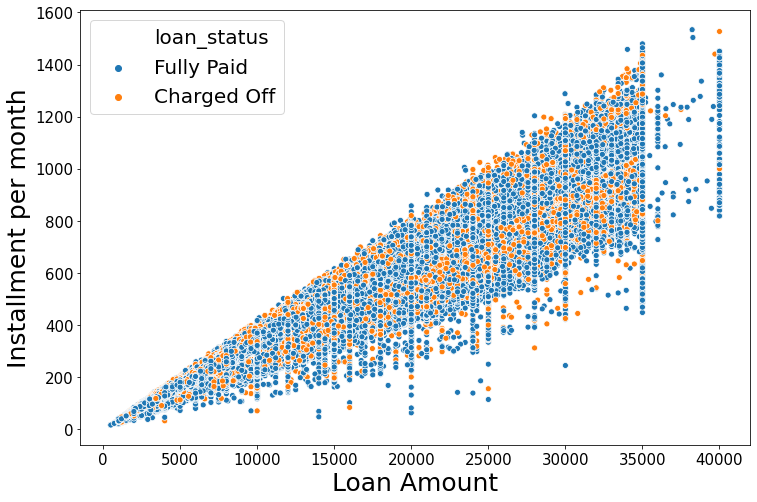

In [10]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=df, x='loan_amnt', y='installment', hue='loan_status')
plt.xlabel('Loan Amount', fontsize=25)
plt.ylabel('Installment per month', fontsize=25)
plt.tick_params(axis='both', labelsize=15)
plt.legend(fontsize=20)

In [ ]:
# It makes sense for the installment to correlate with loan amount well
# as the higher the loan amount is, the more you need to pay each month.

Text(0, 0.5, 'Loan Amount')

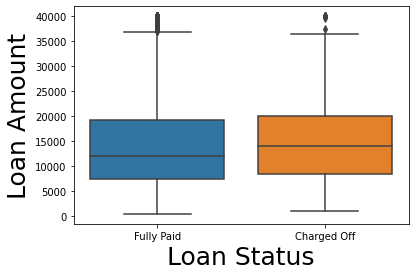

In [14]:
# Create a boxplot showing the relationship between the loan_status and the Loan Amount
sns.boxplot(data=df, x='loan_status', y='loan_amnt')
plt.xlabel('Loan Status', fontsize=25)
plt.ylabel('Loan Amount', fontsize=25)

In [15]:
# Calculate the summary statistics for the loan amount, grouped by the loan_status
df.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


In [ ]:
# The avarage amount for loan charged off is higher than that of loan fully paid.
# It seems the higher the amount is, the more likely it is being charged off as it becomes more difficult to pay in full amount.

(array([-0.3 , -0.25, -0.2 , -0.15, -0.1 , -0.05,  0.  ,  0.05,  0.1 ]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

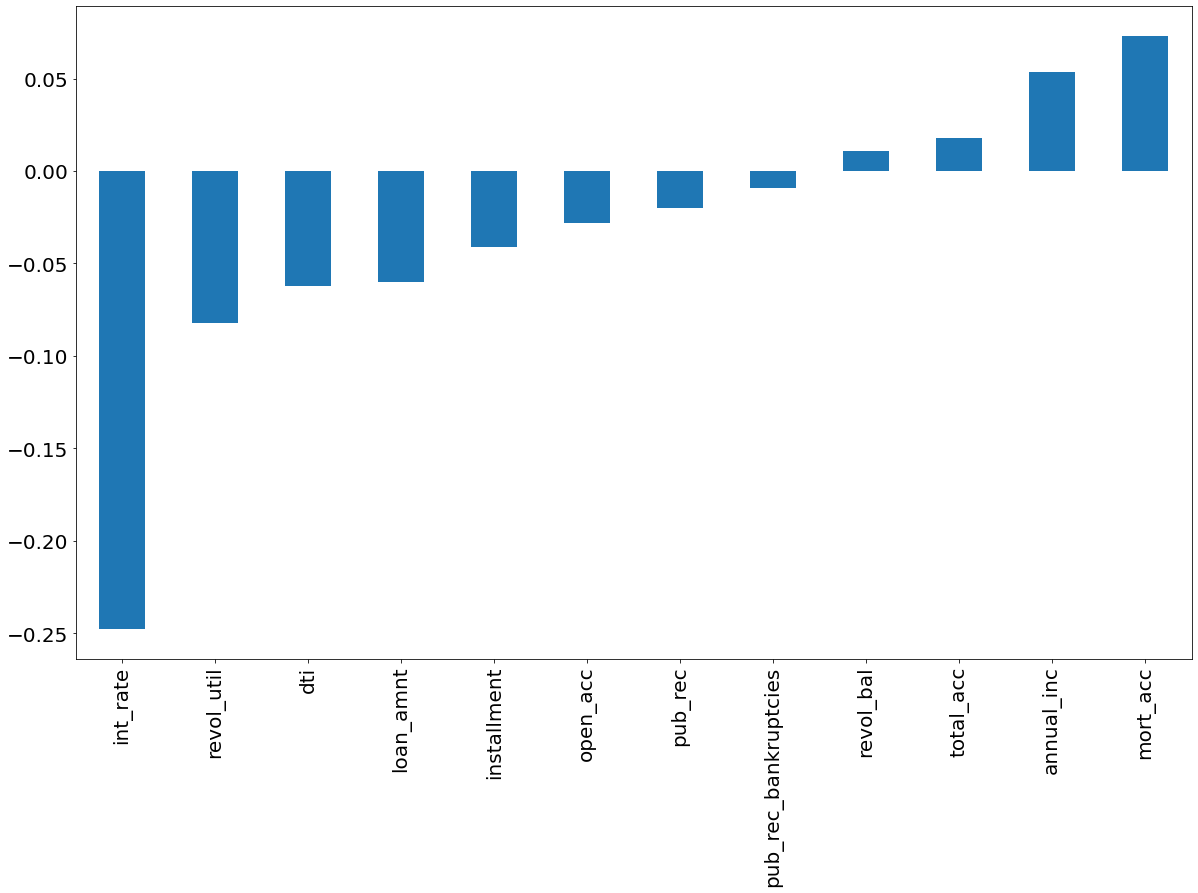

In [75]:
vis_cor = plt.figure(figsize=(20,12))
df.corr()['loan_repaid'][:-1].sort_values().plot(kind='bar')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

In [76]:
abs(df.corr()['loan_repaid'][:-1]).sort_values(ascending=False)

int_rate                0.247758
revol_util              0.082373
mort_acc                0.073111
dti                     0.062413
loan_amnt               0.059836
annual_inc              0.053432
installment             0.041082
open_acc                0.028012
pub_rec                 0.019933
total_acc               0.017893
revol_bal               0.010892
pub_rec_bankruptcies    0.009383
Name: loan_repaid, dtype: float64

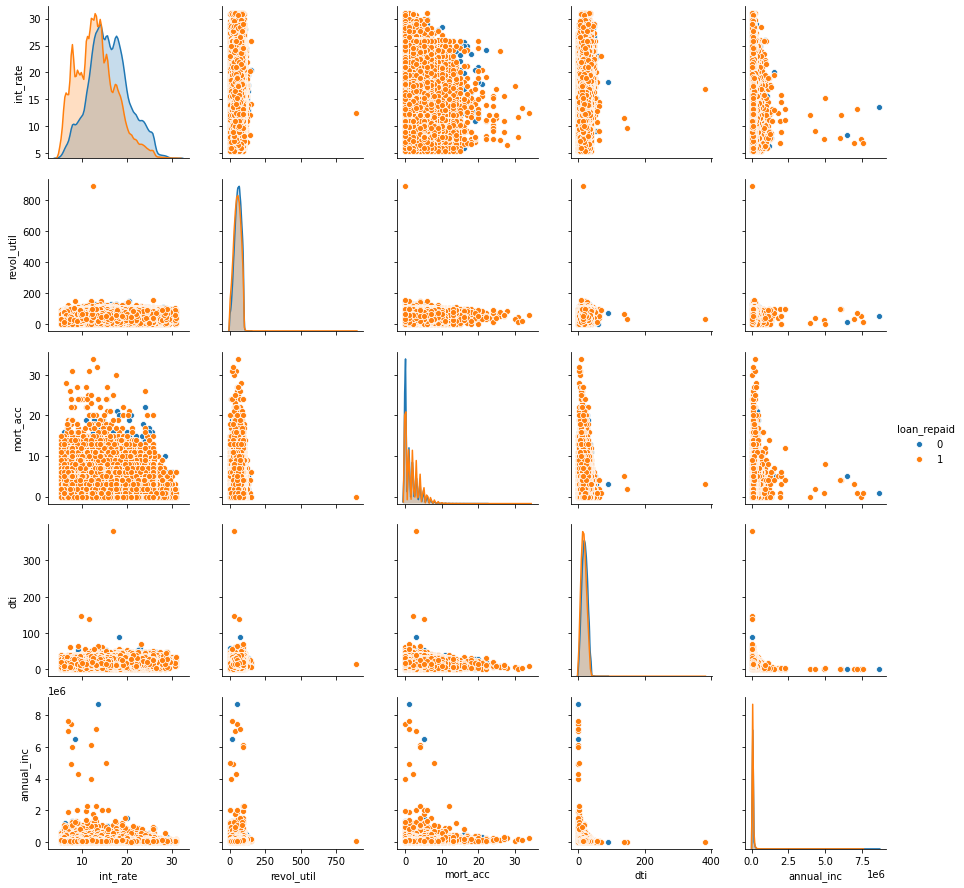

In [86]:
sns.pairplot(df.dropna(), hue='loan_repaid', vars=['int_rate', 'revol_util', 'mort_acc', 'dti', 'annual_inc'])

In [22]:
# Explore the Grade and SubGrade columns that LendingClub attributes to the loans.
grade_order = sorted(df['grade'].unique())
print(grade_order)

['A', 'B', 'C', 'D', 'E', 'F', 'G']


In [23]:
sub_grade_order = sorted(df['sub_grade'].unique())
print(sub_grade_order)

['A1', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5']


In [21]:
# sub_grade is the further division of grade

<AxesSubplot:xlabel='grade', ylabel='count'>

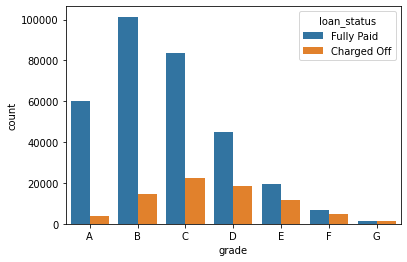

In [24]:
# Create a countplot per grade. Set the hue to the loan_status label.
sns.countplot(data=df, x='grade', hue='loan_status', order=grade_order)

<AxesSubplot:xlabel='sub_grade', ylabel='count'>

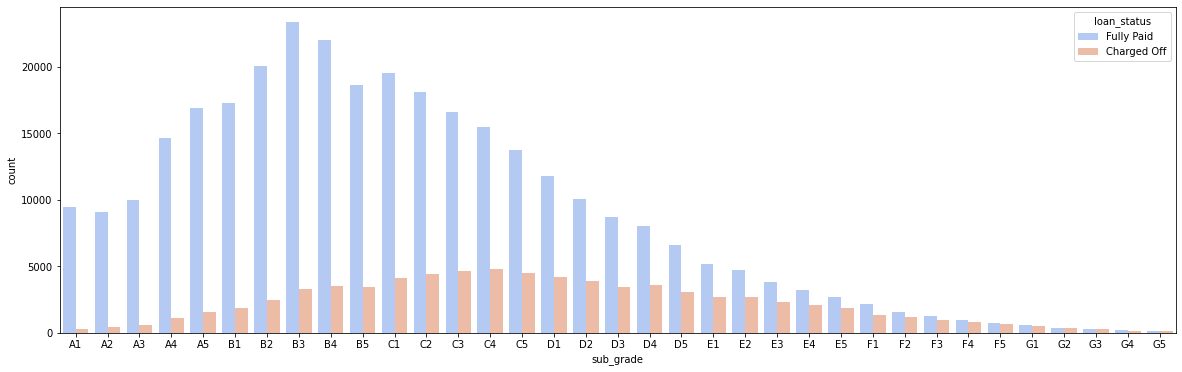

In [28]:
# Create the countplot per subgrade
plt.figure(figsize=(20,6))
sns.countplot(data=df, x='sub_grade', hue='loan_status', order=sub_grade_order, palette='coolwarm')

<AxesSubplot:xlabel='sub_grade', ylabel='count'>

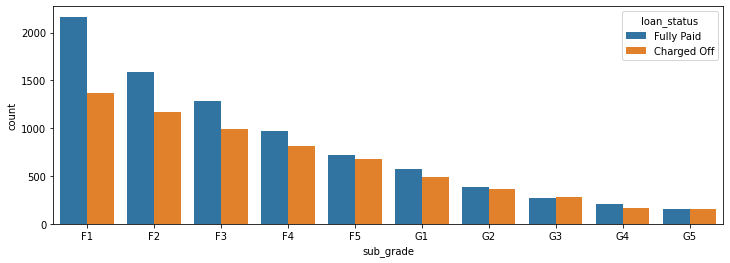

In [29]:
# It looks like F and G subgrades don't get paid back that often. Isloate those and recreate the countplot just for those subgrades.
f_and_g = df[(df['grade']=='G') | (df['grade']=='F')]

plt.figure(figsize=(12,4))
fg_sub_grade_order = sorted(f_and_g['sub_grade'].unique())
sns.countplot(x='sub_grade', data=f_and_g ,order = fg_sub_grade_order,hue='loan_status')

In [33]:
# Create a new column called 'loan_repaid' which will contain a 1 if the loan status was "Fully Paid" and a 0 if it was "Charged Off".
df['loan_repaid'] = df['loan_status'].map({'Fully Paid': 1, 'Charged Off': 0})
df[['loan_status', 'loan_repaid']].head(10)

,loan_status,loan_repaid
0,Fully Paid,1
1,Fully Paid,1
2,Fully Paid,1
3,Fully Paid,1
4,Charged Off,0
5,Fully Paid,1
6,Fully Paid,1
7,Fully Paid,1
8,Fully Paid,1
9,Fully Paid,1


In [54]:
# Create a bar plot showing the correlation of the numeric features to the new loan_repaid
corr_loan_repaid = df.corr()['loan_repaid'].drop('loan_repaid').reset_index().rename(columns={'index': 'feature', 'loan_repaid': 'corr'})
corr_loan_repaid = corr_loan_repaid.sort_values(by='corr') 
corr_loan_repaid

,feature,corr
1,int_rate,-0.247758
8,revol_util,-0.082373
4,dti,-0.062413
0,loan_amnt,-0.059836
2,installment,-0.041082
5,open_acc,-0.028012
6,pub_rec,-0.019933
11,pub_rec_bankruptcies,-0.009383
7,revol_bal,0.010892
9,total_acc,0.017893


Text(0, 0.5, 'Correlation with loan repaid')

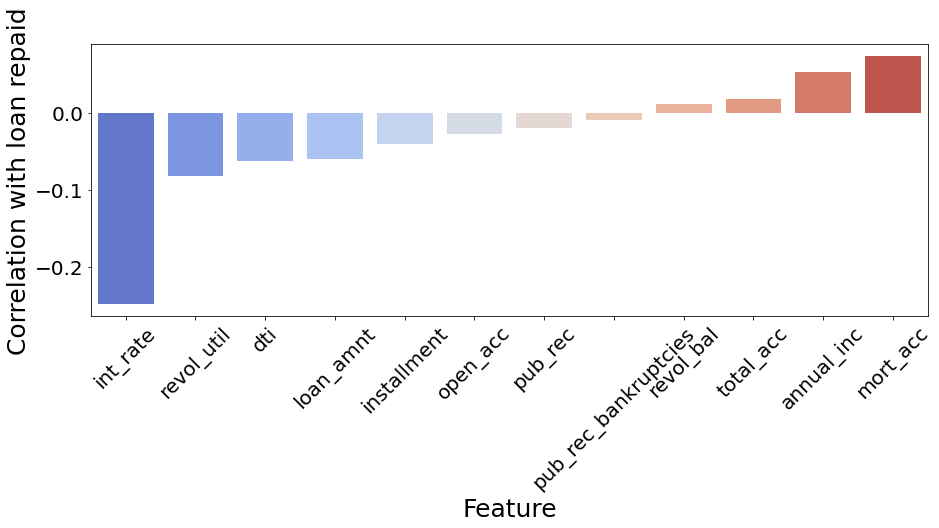

In [67]:
plt.figure(figsize=(15,5))
sns.barplot(data=corr_loan_repaid, x='feature', y='corr', palette='coolwarm')
plt.tick_params(axis='both', labelsize=20)
plt.xticks(rotation=45)
plt.xlabel('Feature', fontsize=25)
plt.ylabel('Correlation with loan repaid', fontsize=25)